In [7]:
!pip install -q kagglehub

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/machine-predictive-maintenance-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/machine-predictive-maintenance-classification


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [10]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv("/content/predictive_maintenance.csv")


In [15]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.
Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică.
După instalare trebuie să facem restart la runtime.

In [16]:
!pip uninstall pandas-profiling

In [17]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a93c0c42dc0f43c567fa37350983a6fe01e866810d24d8a1e41cc5c8a919c641
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [18]:
from ydata_profiling import ProfileReport

In [19]:
prof=ProfileReport(df)

In [20]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='/content/output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
prof

In [22]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [23]:
prof.to_file(output_file='/content/output-min.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 42.23it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
prof

In [26]:
print(df.columns)


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


In [27]:
# Eliminăm identificatorii și coloanele care nu trebuie folosite
X = df.drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)

# Convertim coloana 'Type' într-un format numeric
X = pd.get_dummies(X, columns=['Type'])

# Etichetele pentru clasificare
y = df['Target']


In [28]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [29]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [30]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(273, 8000)

In [31]:
sum(y_test), len(y_test)

(66, 2000)

In [32]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [33]:
X_train

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
7950                300.8                    311.6                    1568   
2872                300.8                    309.6                    1680   
9057                297.3                    308.4                    1686   
1394                299.1                    310.4                    1527   
9013                297.2                    308.0                    1435   
...                   ...                      ...                     ...   
2013                298.6                    308.4                    1485   
5534                302.3                    311.7                    1494   
681                 297.7                    309.0                    1656   
7802                299.9                    311.3                    1429   
7140                300.5                    309.9                    1382   

      Torque [Nm]  Tool wear [min]  Type_H  Type_L  Type_M  
7950         36.0               23   False    True   False  
2872         28.7               22   False    True   False  
9057         34.5               97   False   False    True  
1394         44.0              149   False    True   False  
9013         43.0              202    True   False   False  
...           ...              ...     ...     ...     ...  
2013         42.9               38   False    True   False  
5534         37.1              114   False   False    True  
681          33.2               20   False   False    True  
7802         58.2              103   False    True   False  
7140         46.5              134   False    True   False  

[8000 rows x 8 columns]

In [34]:
y_train

7950    0
2872    0
9057    0
1394    0
9013    0
       ..
2013    0
5534    0
681     0
7802    0
7140    0
Name: Target, Length: 8000, dtype: int64

In [35]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
scaler = StandardScaler()

sc = MinMaxScaler((-1, 1))

In [36]:
scaler.fit(X_train)

StandardScaler()

In [37]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_test

array([[ 0.83867078, -0.13970631, -0.77934968, ..., -0.33425849,
         0.81905053, -0.65621274],
       [ 1.08748098,  0.5972208 ,  0.36599341, ..., -0.33425849,
         0.81905053, -0.65621274],
       [-0.9527627 , -0.80964004, -0.58475255, ..., -0.33425849,
        -1.22092589,  1.52389604],
       ...,
       [-0.50490433, -0.67565329,  1.47797699, ..., -0.33425849,
        -1.22092589,  1.52389604],
       [-1.30109698, -1.1446069 , -0.30675666, ..., -0.33425849,
        -1.22092589,  1.52389604],
       [ 0.34105037,  0.66421417, -0.89610795, ..., -0.33425849,
         0.81905053, -0.65621274]])

In [39]:
print(scaler.mean_)

[3.00014637e+02 3.10008537e+02 1.53817287e+03 4.00190125e+01
 1.08372625e+02 1.00500000e-01 5.98500000e-01 3.01000000e-01]


In [40]:
len(X_train)

8000

In [41]:
from torch.utils.data import Dataset, DataLoader

In [42]:
import torch
from torch import nn, optim

In [58]:
from torch.utils.data import Dataset
import torch

class MaintenanceDataset(Dataset):
    def __init__(self, x, y):
        self.len = len(x)
        self.x = torch.tensor(x.values).float() if hasattr(x, 'values') else torch.tensor(x).float()
        self.y = torch.tensor(y.values).long() if hasattr(y, 'values') else torch.tensor(y).long()

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len



In [59]:
trainDataset = MaintenanceDataset(X_train, y_train)


In [60]:
trainDataset[0]

(tensor([ 0.3908,  1.0662,  0.1658, -0.4027, -1.3431, -0.3343,  0.8191, -0.6562]),
 tensor(0))

In [61]:
trainLoader=DataLoader(dataset=trainDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [63]:
trainDataset = MaintenanceDataset(X_train, y_train)
validationDataset = MaintenanceDataset(X_test, y_test)


In [64]:
validationLoader=DataLoader(dataset=validationDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [66]:
import torch.nn as nn

class MaintenanceNN(nn.Module):
    def __init__(self):
        super(MaintenanceNN, self).__init__()

        self.sequential = nn.Sequential(
            nn.Linear(11, 10),  # 11 input features
            nn.ReLU(),
            nn.Linear(10, 6),
            nn.ReLU(),
            nn.Linear(6, 2)     # 2 output classes (defect / normal)
        )

    def forward(self, x):
        return self.sequential(x)


In [81]:
import torch.nn as nn

class MaintenanceNN(nn.Module):
    def __init__(self, input_dim):
        super(MaintenanceNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.fc2 = nn.Linear(10, 6)
        self.fc3 = nn.Linear(6, 2)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        return self.fc3(x)



In [82]:
net = MaintenanceNN(X_train.shape[1])



In [83]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [84]:
print(f"Model has {count_parameters(net):,} number of trainable parameters.")

Model has 170 number of trainable parameters.


In [85]:
optimizer = optim.Adam(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [86]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
train_losses = []

In [87]:
# Colectăm accuratetea pentru a o plota ulterior
train_accuracies = []
validation_accuracies = []

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()
    correct = 0
    losses=[]

    for batch_idx, data in enumerate(trainLoader, 0):
      inputs, labels = data
      #Obținem predictii
      outputs = net(inputs)
      # Compute and print loss
      loss = criterion(outputs, labels)

      losses.append(loss.item())
      # Zero gradients, perform a backward pass, and update the weights.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


      #Obținem predictiile pentru fiecare linie din setul de validare.
      #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare
      pred = outputs.data.max(1, keepdim=True)[1]

      #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
      correct += pred.eq(labels.data.view_as(pred)).sum()
      current_correct=pred.eq(labels.data.view_as(pred)).sum()


      print(f"[Train Epoch: {epoch}, Batch: {batch_idx+1}, Loss: {loss.item()}, Accuracy: {100. * current_correct/len(inputs):.2f}%")
    mean_loss=sum(losses)/len(losses)
    accuracy = 100. * correct/len(trainLoader.dataset)
    scheduler.step(mean_loss)
    train_losses.append(mean_loss)
    train_accuracies.append(accuracy)

    print(f"[TRAIN] Epoch: {epoch} Loss:{mean_loss}, Accuracy: {accuracy:.2f}%")

In [90]:
# Colectăm loss-ul din validare pentru a o plota ulterior
validation_losses=[]

In [91]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    valid_loss=[]
    correct = 0

    with torch.no_grad():
        for batch_idx, data in enumerate(validationLoader, 0):
          inputs, labels = data

          output=net(inputs)

          loss= criterion(output, labels)
          valid_loss.append(loss.item())

          #Obținem predictiile pentru fiecare linie din setul de validare.
          #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare
          pred = output.data.max(1, keepdim=True)[1]

          #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
          correct += pred.eq(labels.data.view_as(pred)).sum()
          current_correct=pred.eq(labels.data.view_as(pred)).sum()
          print("============")
          print(f"[Validation set] Batch index: {batch_idx+1} Batch loss: {loss.item()}, Accuracy: {100. * current_correct/len(inputs):.2f}%")
          print("============")
        mean_loss=sum(valid_loss)/len(valid_loss)
        validation_losses.append(mean_loss)
        accuracy = 100. * correct/len(validationLoader.dataset)
        print(f"[Validation set] Loss: {mean_loss}, Accuracy: {accuracy:.2f}%")

        validation_accuracies.append(accuracy)


In [92]:
for epoch in range(20):
    train(epoch)
    validation()


Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
[Validation set] Batch index: 15 Batch loss: 0.018277818337082863, Accuracy: 100.00%
[Validation set] Batch index: 16 Batch loss: 0.11950387060642242, Accuracy: 96.88%
[Validation set] Batch index: 17 Batch loss: 0.035898685455322266, Accuracy: 100.00%
[Validation set] Batch index: 18 Batch loss: 0.1620558500289917, Accuracy: 93.75%
[Validation set] Batch index: 19 Batch loss: 0.04584019258618355, Accuracy: 100.00%
[Validation set] Batch index: 20 Batch loss: 0.1407911777496338, Accuracy: 96.88%
[Validation set] Batch index: 21 Batch loss: 0.06627875566482544, Accuracy: 96.88%
[Validation set] Batch index: 22 Batch loss: 0.07513204216957092, Accuracy: 96.88%
[Validation set] Batch index: 23 Batch loss: 0.21822482347488403, Accuracy: 96.88%
[Validation set] Batch index: 24 Batch loss: 0.02483702450990677, Accuracy: 100.00%
[Validation set] Batch index: 25 Batch loss: 0.05298657342791557, Accuracy: 96.88%
[Validation s

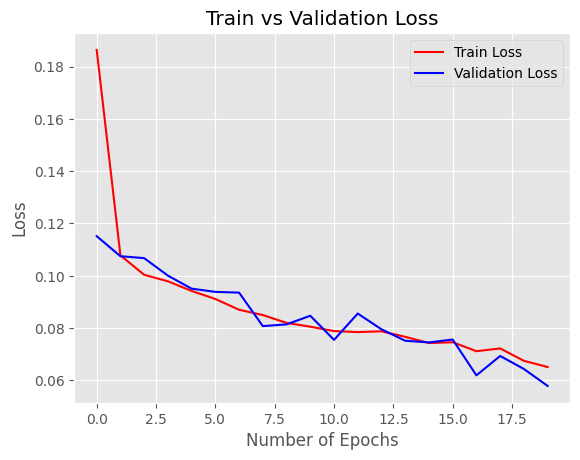

In [93]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.title("Train vs Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(train_losses, "r-", label='Train Loss')
plt.plot(validation_losses, "b-", label ='Validation Loss')
plt.legend(loc="upper right")

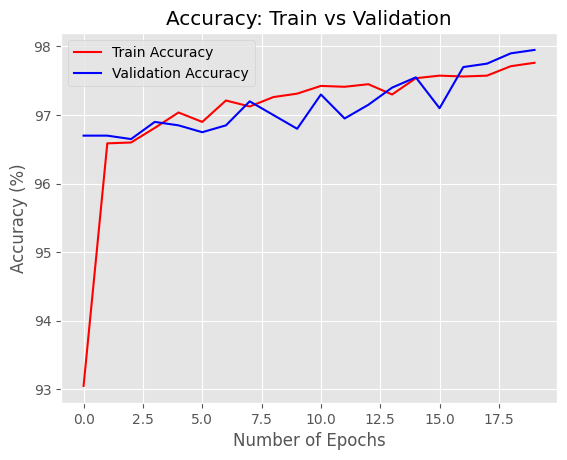

In [94]:
plt.title("Accuracy: Train vs Validation")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy (%)")
plt.plot(train_accuracies, "r-", label='Train Accuracy')
plt.plot(validation_accuracies, 'b-', label='Validation Accuracy')
plt.legend(loc="upper left")

In [95]:
#Let's try and feed a single example in the neural network and see if it gets it right
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(validationDataset[index_from_the_validation_set][0].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    return preds_y

In [96]:
index_of_test=30

In [97]:
print(f"Neural network response is: {try_a_single_example_with_the_network(index_of_test).item()}")
print(f"Actual response is: {validationDataset[index_of_test][1].view(-1).item()}")


Neural network response is: 0
Actual response is: 0
